In [1]:
import sys
import os
import struct
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
%matplotlib inline

fpX = np.float32

import torch 
root = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(os.path.join(root, 'code'))
from plotting import load_fits, plot_utils, summary_plots, plot_prf_params
plot_utils.set_plotting_defaults()
from utils import roi_utils, nsd_utils, default_paths


In [2]:
subject = 1
volume_space=True
fitting_type1 = 'alexnet_all_conv'
fitting_type2 = 'alexnet_all_conv'
# fitting_type1 = 'gabor_solo_ridge_4ori_4sf'
# fitting_type1 = 'alexnet_Conv5'
# fitting_type2 = 'sketch_tokens'
# fitting_type2 = 'alexnet_Conv5'

root = os.path.dirname(os.path.dirname(os.getcwd()))
out1, fig_save_folder = load_fits.load_fit_results(subject, volume_space, fitting_type1, n_from_end=2, root=root, verbose=True);
# load_fits.print_output_summary(out1)
print('\n')
out2, fig_save_folder = load_fits.load_fit_results(subject, volume_space, fitting_type2, n_from_end=3, root=root, verbose=True);
# load_fits.print_output_summary(out2)

if not os.path.exists(fig_save_folder):
    os.makedirs(fig_save_folder)
    
fitting_type1 = 'alexnet reflect-pad'
fitting_type2 = 'alexnet zero-pad'


loading from /user_data/mmhender/imStat/model_fits/S01/alexnet_all_conv/Nov-01-2021_2240_40/all_fit_params

dict_keys(['subject', 'volume_space', 'fitting_type', 'fitting_type2', 'voxel_mask', 'brain_nii_shape', 'image_order', 'voxel_index', 'voxel_roi', 'voxel_ncsnr', 'aperture', 'aperture_rf_range', 'which_prf_grid', 'models', 'best_losses', 'best_lambdas', 'best_params', 'lambdas', 'val_cc', 'val_r2', 'partial_masks', 'partial_version_names', 'zscore_features', 'zscore_in_groups', 'ridge', 'debug', 'up_to_sess', 'shuff_rnd_seed', 'use_precomputed_prfs', 'alexnet_layer_name', 'alexnet_padding_mode'])


loading from /user_data/mmhender/imStat/model_fits/S01/alexnet_all_conv/Nov-01-2021_1424_05/all_fit_params

dict_keys(['subject', 'volume_space', 'fitting_type', 'fitting_type2', 'voxel_mask', 'brain_nii_shape', 'image_order', 'voxel_index', 'voxel_roi', 'voxel_ncsnr', 'aperture', 'aperture_rf_range', 'which_prf_grid', 'models', 'best_losses', 'best_lambdas', 'best_params', 'lambdas', 

In [3]:
# roi_def = roi_utils.get_combined_rois(subject,include_all=False,include_body=False,volume_space=True,verbose=False) 
roi_def = roi_utils.get_combined_rois(subject,include_all=True,include_body=True,volume_space=True,verbose=False) 

skip_inds = [10,11,15,23]
retlabs, facelabs, placelabs, bodylabs, \
        ret_names, face_names, place_names, body_names = roi_def


In [4]:
# get pars for the first method (fitting type 1)
best_ecc_deg, best_angle_deg, best_size_deg = plot_prf_params.get_prf_pars_deg(out1, screen_eccen_deg=8.4)

angle_mapping, eccen_mapping, size_mapping, \
    exponent_mapping, gain_mapping, rsq_mapping = nsd_utils.load_prf_mapping_pars(subject=1, \
                                                      voxel_mask = out1['voxel_mask'])



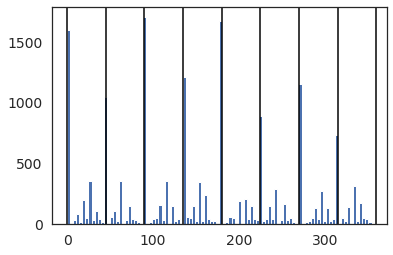

In [5]:
plt.figure();
plt.hist(best_angle_deg, 100);
for ii in range(0,361, 45):
    plt.axvline(ii, color='k')

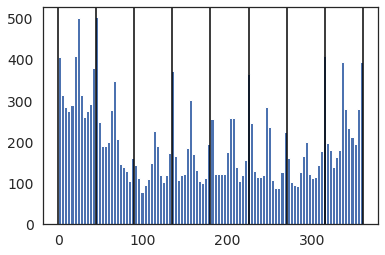

In [7]:
plt.figure();
plt.hist(angle_mapping, 100);
for ii in range(0,361, 45):
    plt.axvline(ii, color='k')

In [6]:

port=33333

vox2plot = (out1['val_r2'][:,0]>0) & (rsq_mapping>0)

best_ecc_deg, best_angle_deg, best_size_deg = plot_prf_params.get_prf_pars_deg(out1, screen_eccen_deg=8.4)

names = ['pRF eccentricity (from FWRF)', 'pRF angle (from FWRF)', \
         'pRF size (from FWRF)', \
        'R2 from FWRF model', 'Corr coef from FWRF model']
maps = [best_ecc_deg, best_angle_deg, best_size_deg, out1['val_r2'][:,0], out1['val_cc'][:,0]]
cmaps = ['PRGn', 'Retinotopy_RYBCR', 'PRGn', 'PuBu', 'PuBu']
mins = [0,0,0, 0, 0]
maxes = [7, 360, 4, 0.8, 0.8]

names += ['pRF eccentricity (from mapping)', 'pRF angle (from mapping)', 'pRF size (from mapping)', \
        'R2 (from mapping)', 'Gain (from mapping)', 'Exponent (from mapping)']
maps += [eccen_mapping, angle_mapping, size_mapping, rsq_mapping, gain_mapping, exponent_mapping ]
cmaps += ['PRGn', 'Retinotopy_RYBCR', 'PRGn','PuBu','PuBu','PuBu']
mins += [0,0,0,0,0,0]
maxes += [7, 360, 4, 0.8, 40, 120]

plot_utils.plot_maps_pycortex(maps, names, subject, out1, roi_def=roi_def, vox2plot=vox2plot, \
                              fitting_type=fitting_type1, \
                              port=port, cmaps=cmaps, mins=mins, maxes=maxes)

Data is in 3d volume space
navigate browser to: 127.0.0.1:33333
Started server on port 33333
Stopping server


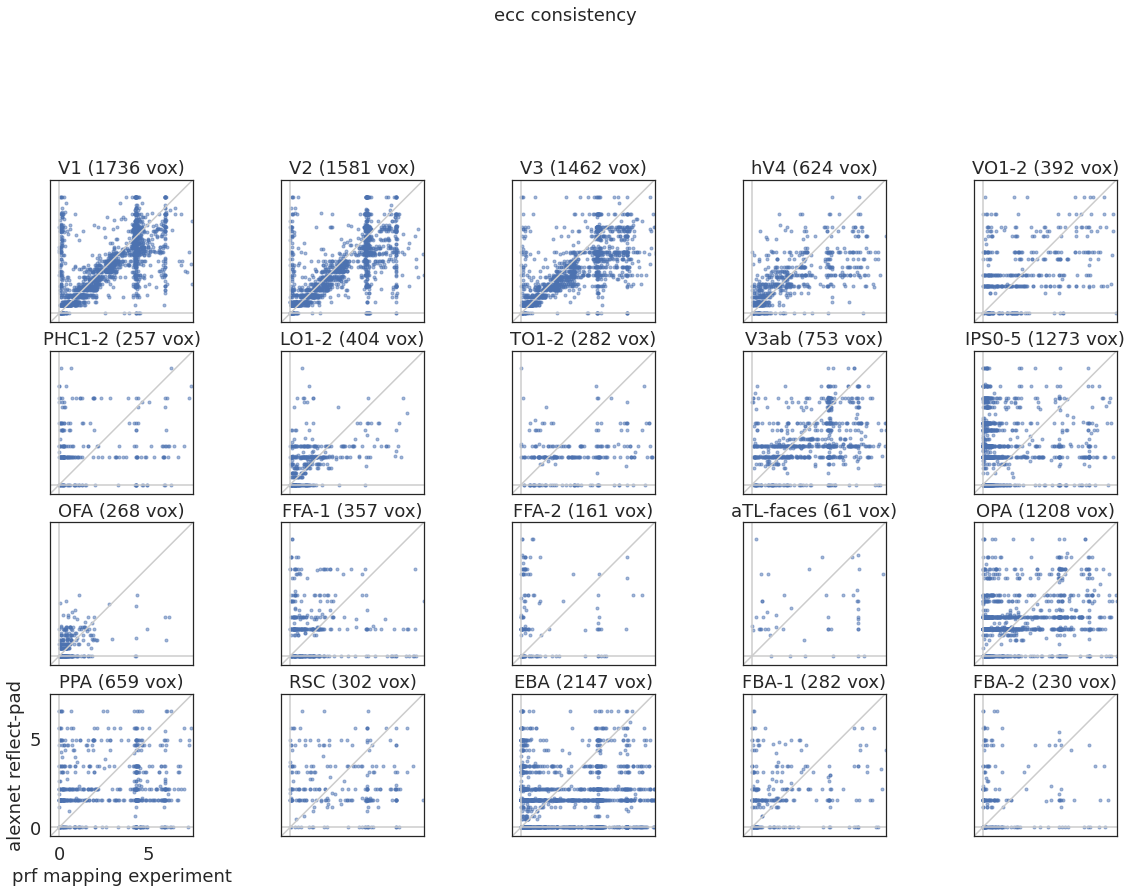

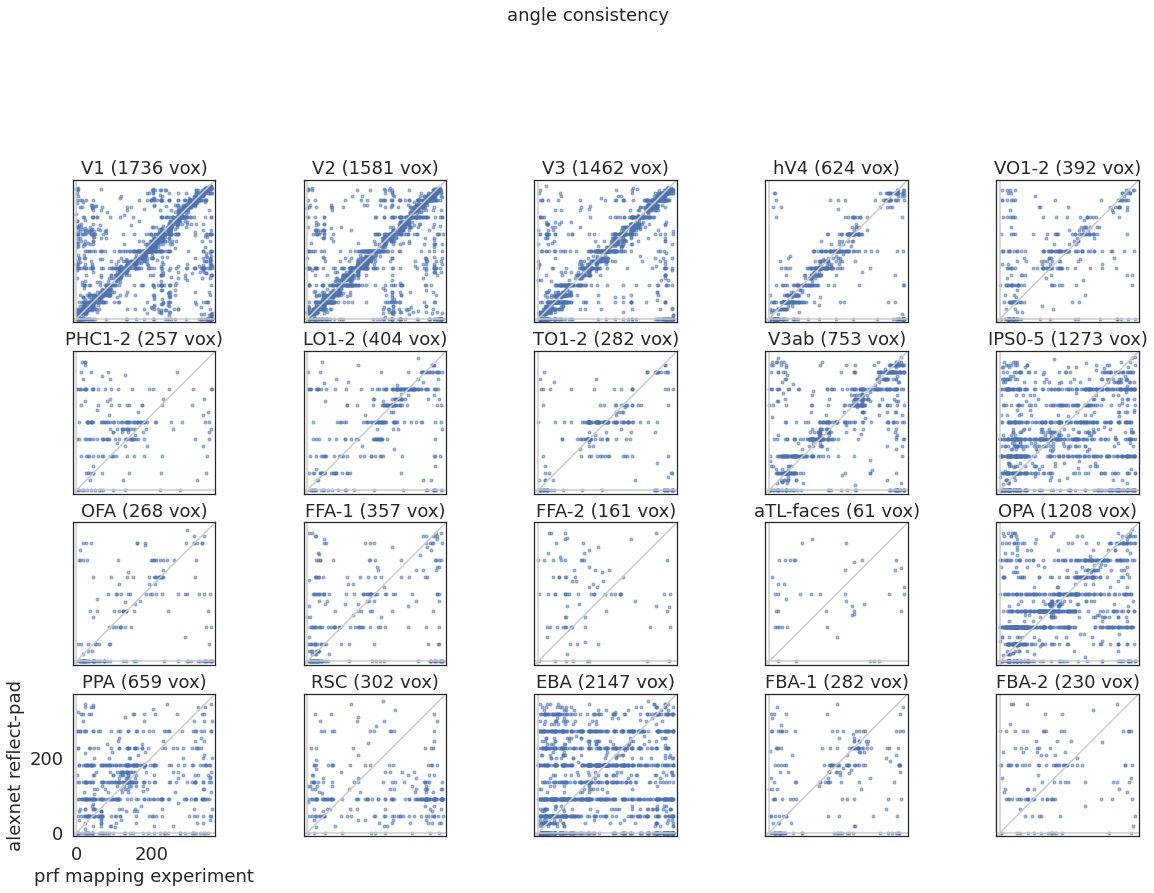

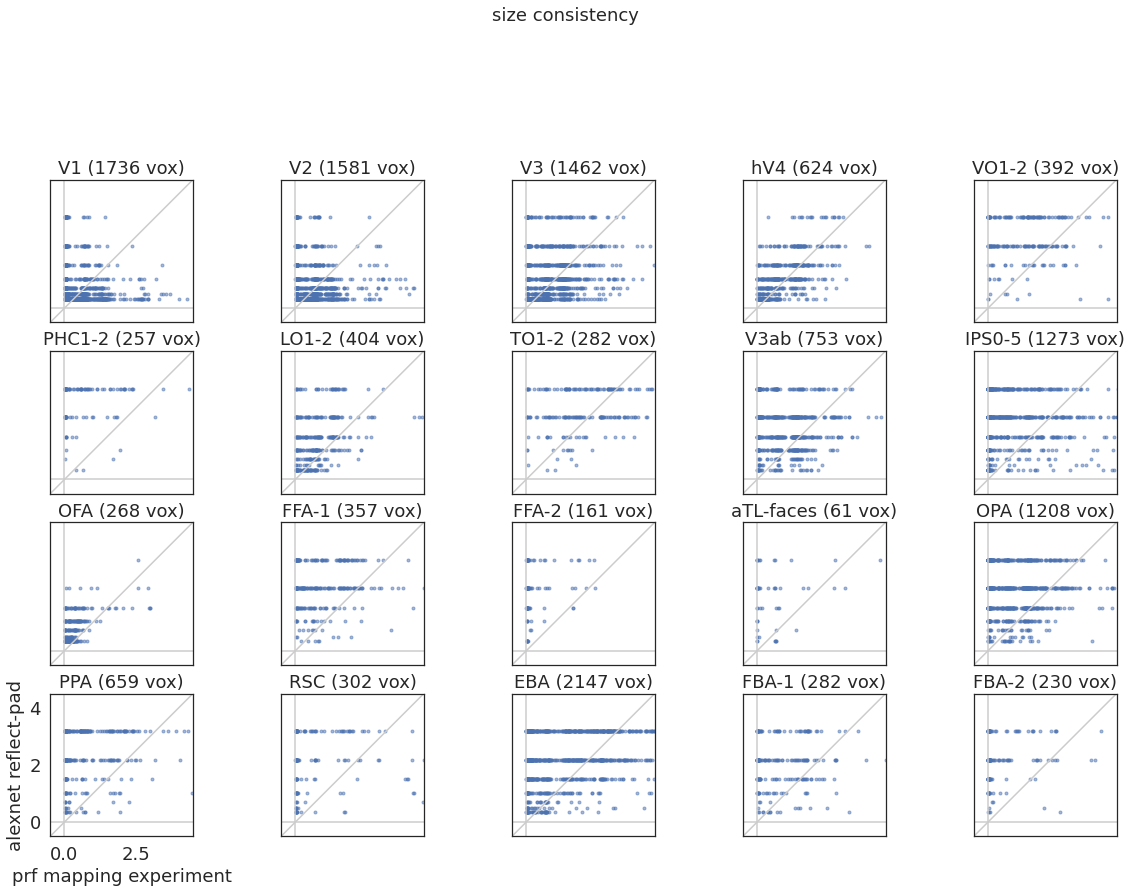

In [7]:

pars1 = [eccen_mapping, angle_mapping, size_mapping]
pars2 = plot_prf_params.get_prf_pars_deg(out1, screen_eccen_deg=8.4)
parnames = ['ecc','angle','size']

plot_utils.set_all_font_sizes(fs = 18)
fig_size=(20,24)

parlims = [[-0.5, 7.5], [-10, 370], [-0.5, 4.5]]

for pp in range(3):

    models1 = pars1[pp][:,np.newaxis]
    models2 = pars2[pp][:,np.newaxis]

    inds2use = (out1['val_r2'][:,0]>0) & (rsq_mapping>0)

    sp = plot_utils.scatter_plot(color=[0.29803922, 0.44705882, 0.69019608, 0.5], xlims = parlims[pp], \
                                 ylims = parlims[pp], 
                                 xlabel='prf mapping experiment', ylabel=fitting_type1, 
                                                            show_diagonal=True, show_axes=True);

    if fig_size is None:
        fig_size = (20,18)
    plot_utils.create_roi_subplots(np.concatenate([models1, models2], axis=1), inds2use, sp, subject, out1,\
                        suptitle='%s consistency'%parnames[pp], \
                       label_just_corner=True, figsize=fig_size, roi_def=roi_def, skip_inds=skip_inds)
    plt.gcf().subplots_adjust(bottom=0.5)
    

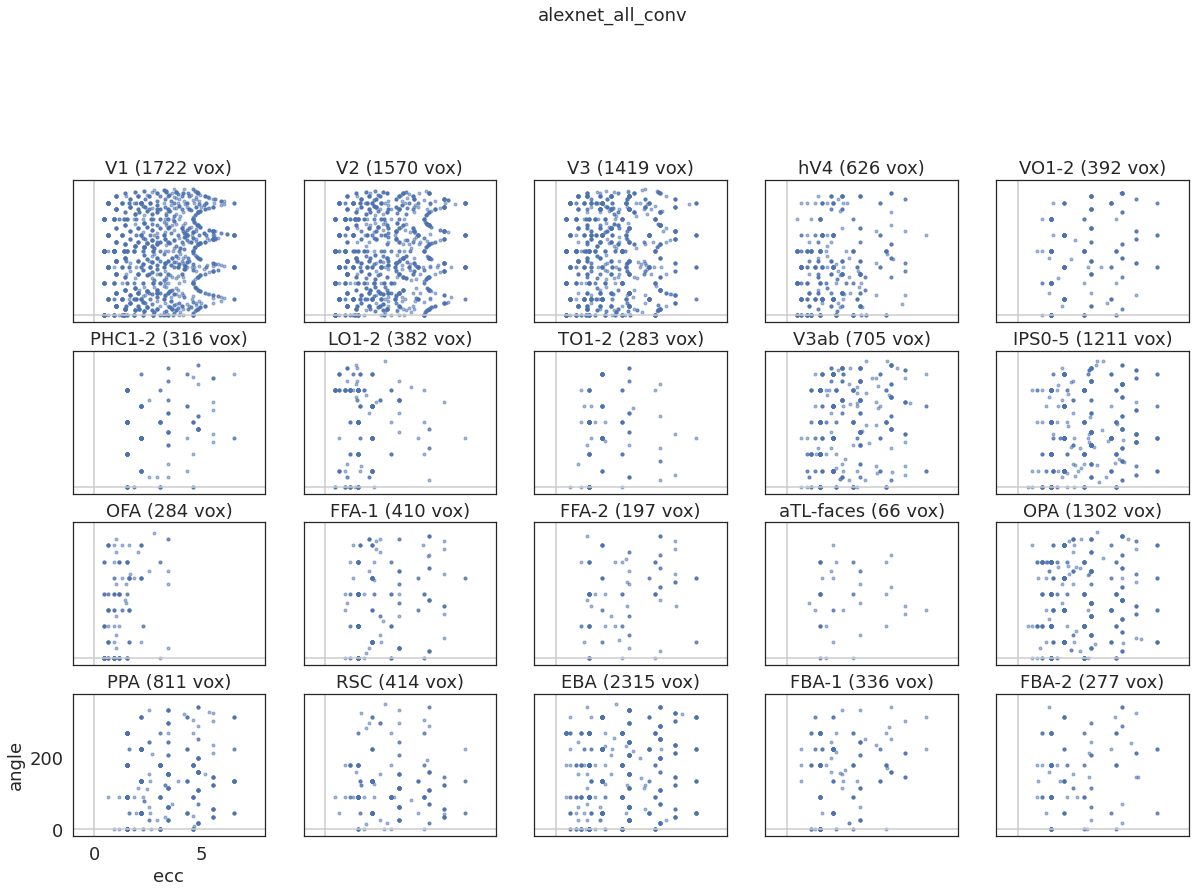

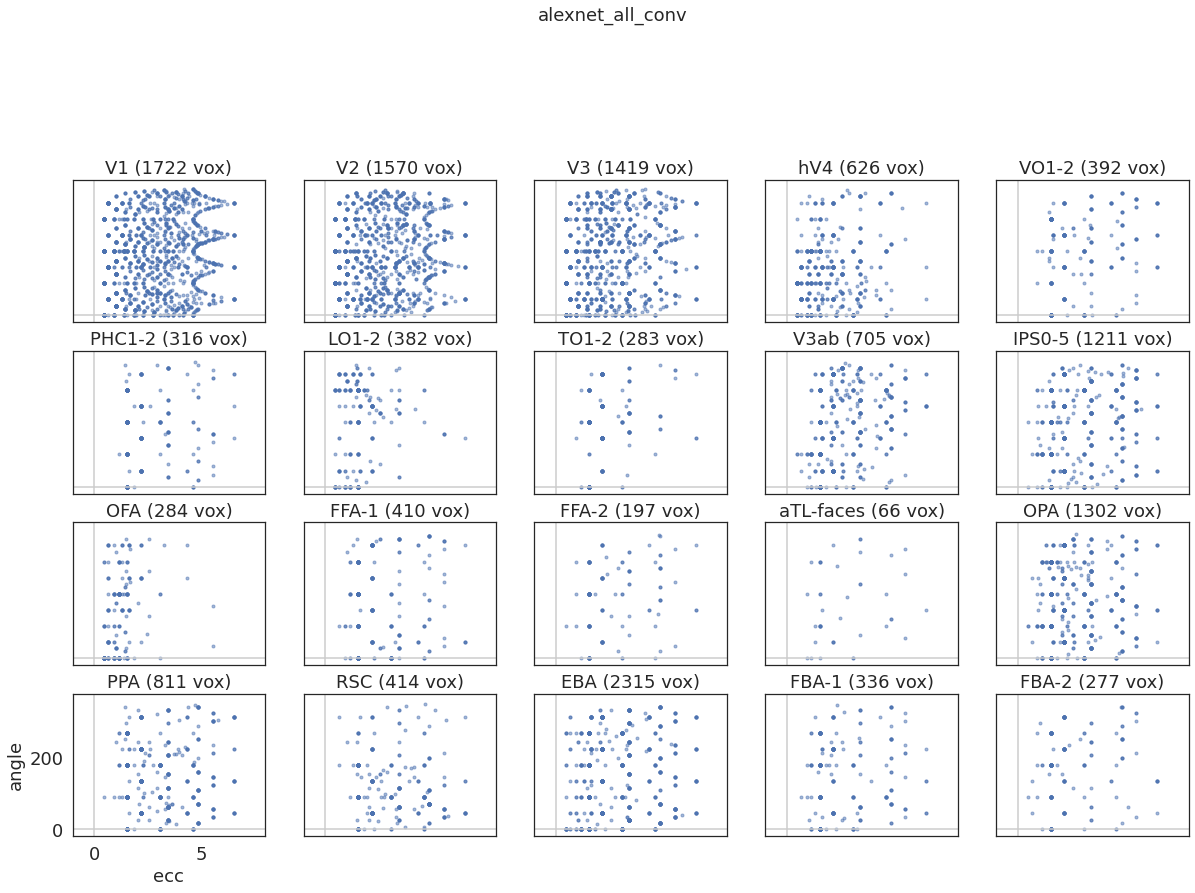

In [24]:
pars1 = plot_prf_params.get_prf_pars_deg(out1, screen_eccen_deg=8.4)
pars2 = plot_prf_params.get_prf_pars_deg(out2, screen_eccen_deg=8.4)

plot_utils.set_all_font_sizes(fs = 18)
fig_size=(20,24)
parnames = ['ecc','angle']
parlims = [[-1, 8], [-20, 380]]
fitting_types = [fitting_type1, fitting_type2]

pars = pars2
for mm, pars in enumerate([pars1, pars2]):

    par1 = pars[0][:,np.newaxis]
    par2 = pars[1][:,np.newaxis]
#     print(par2[0:10])

    inds2use = (out1['val_r2'][:,0]>0) & (out2['val_r2'][:,0]>0) 
    #     inds2use = (out1['val_r2'][:,0]>0) & (out2['val_r2'][:,0]>0.1) 
    #     inds2use = np.ones((len(retlabs),))==1

    sp = plot_utils.scatter_plot(color=[0.29803922, 0.44705882, 0.69019608, 0.5], xlims = parlims[0], \
                                 ylims = parlims[1], 
                                 xlabel=parnames[0], ylabel = parnames[1], \
                                show_diagonal=False, show_axes=True, square=False);

    if fig_size is None:
        fig_size = (20,18)
    plot_utils.create_roi_subplots(np.concatenate([par1, par2], axis=1), inds2use, sp, subject, out1,\
                        suptitle='%s'%fitting_types[mm], \
                       label_just_corner=True, figsize=fig_size, roi_def=roi_def, skip_inds=skip_inds)
    plt.gcf().subplots_adjust(bottom=0.5)



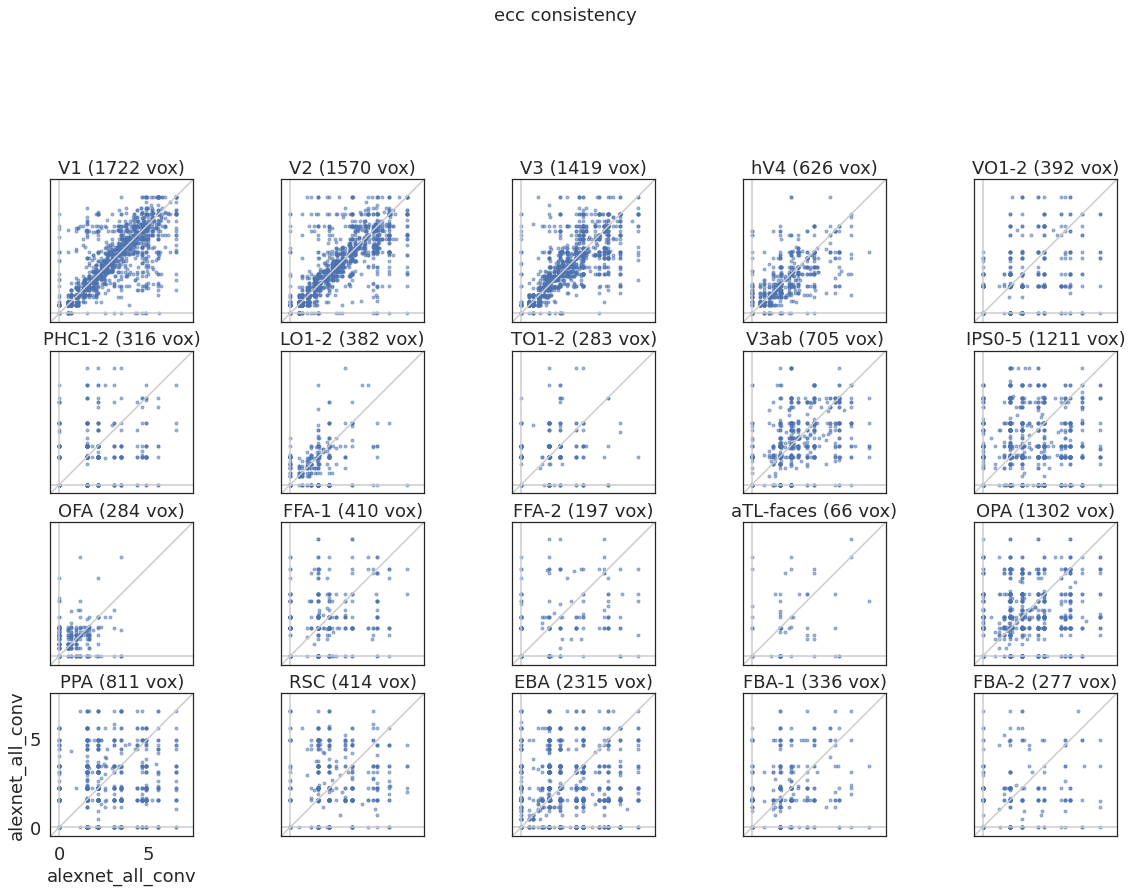

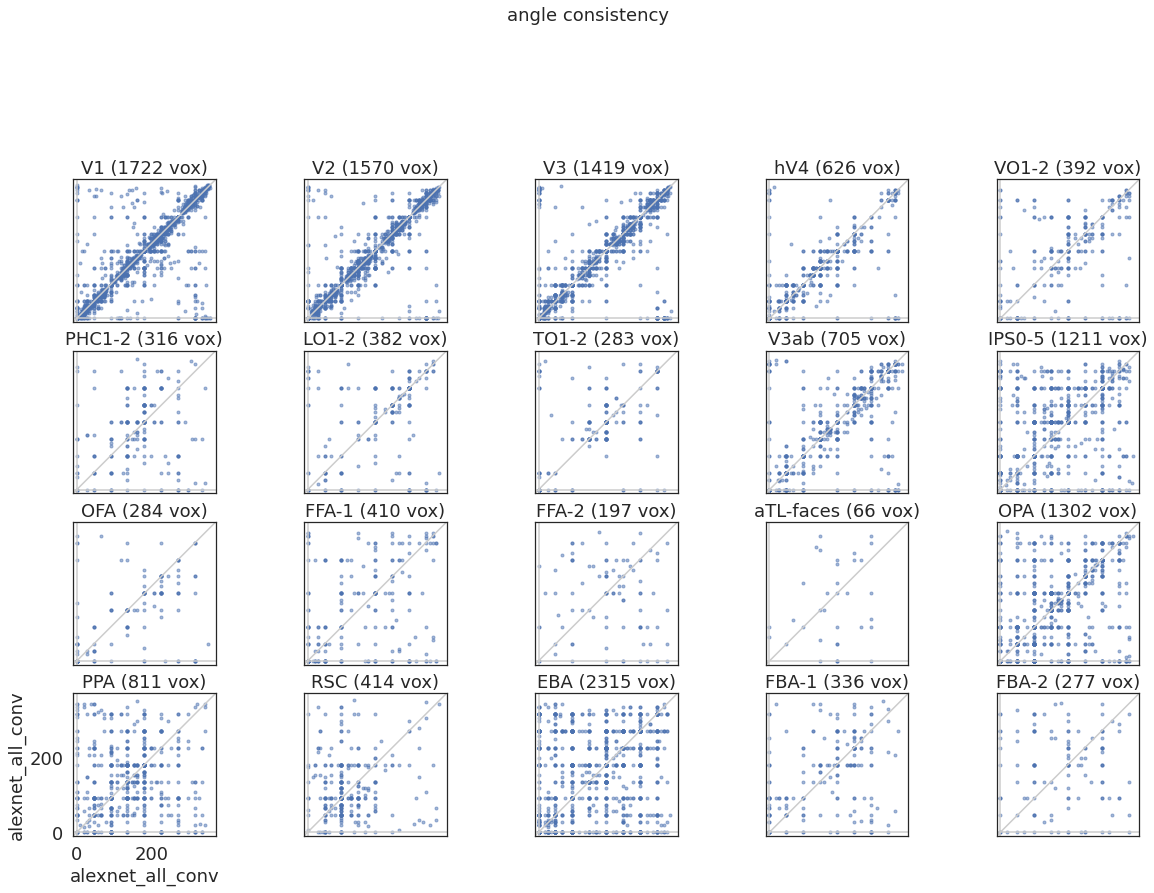

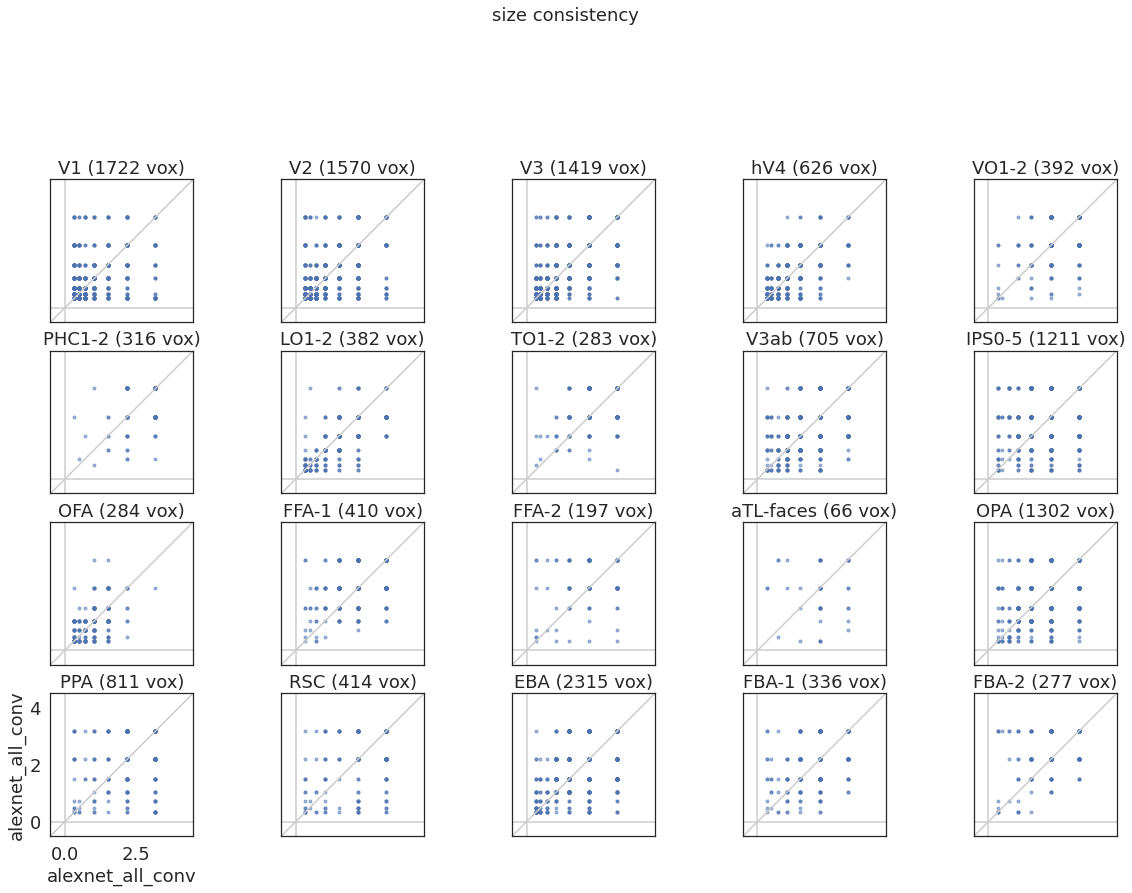

In [25]:
pars1 = plot_prf_params.get_prf_pars_deg(out1, screen_eccen_deg=8.4)
pars2 = plot_prf_params.get_prf_pars_deg(out2, screen_eccen_deg=8.4)
parnames = ['ecc','angle','size']
from utils import nsd_utils
plot_utils.set_all_font_sizes(fs = 18)
fig_size=(20,24)

parlims = [[-0.5, 7.5], [-10, 370], [-0.5, 4.5]]

for pp in range(3):
    

    models1 = pars1[pp][:,np.newaxis]
    models2 = pars2[pp][:,np.newaxis]
#     print(models2[0:10])

    inds2use = (out1['val_r2'][:,0]>0) & (out2['val_r2'][:,0]>0) 
#     inds2use = inds2use & (pars2[0]>0)
#     inds2use = (out1['val_r2'][:,0]>0) & (out2['val_r2'][:,0]>0) 
#     inds2use = (out1['val_r2'][:,0]>0) & (out2['val_r2'][:,0]>0.1) 
#     inds2use = np.ones((len(retlabs),))==1

    sp = plot_utils.scatter_plot(color=[0.29803922, 0.44705882, 0.69019608, 0.5], xlims = parlims[pp], \
                                 ylims = parlims[pp], 
                                 xlabel=fitting_type1, ylabel=fitting_type2, 
                                                            show_diagonal=True, show_axes=True);

    if fig_size is None:
        fig_size = (20,18)
    plot_utils.create_roi_subplots(np.concatenate([models1, models2], axis=1), inds2use, sp, subject, out1,\
                        suptitle='%s consistency'%parnames[pp], \
                       label_just_corner=True, figsize=fig_size, roi_def=roi_def, skip_inds=skip_inds)
    plt.gcf().subplots_adjust(bottom=0.5)
    

In [13]:
np.sum(np.isnan(pars1[0]))

0

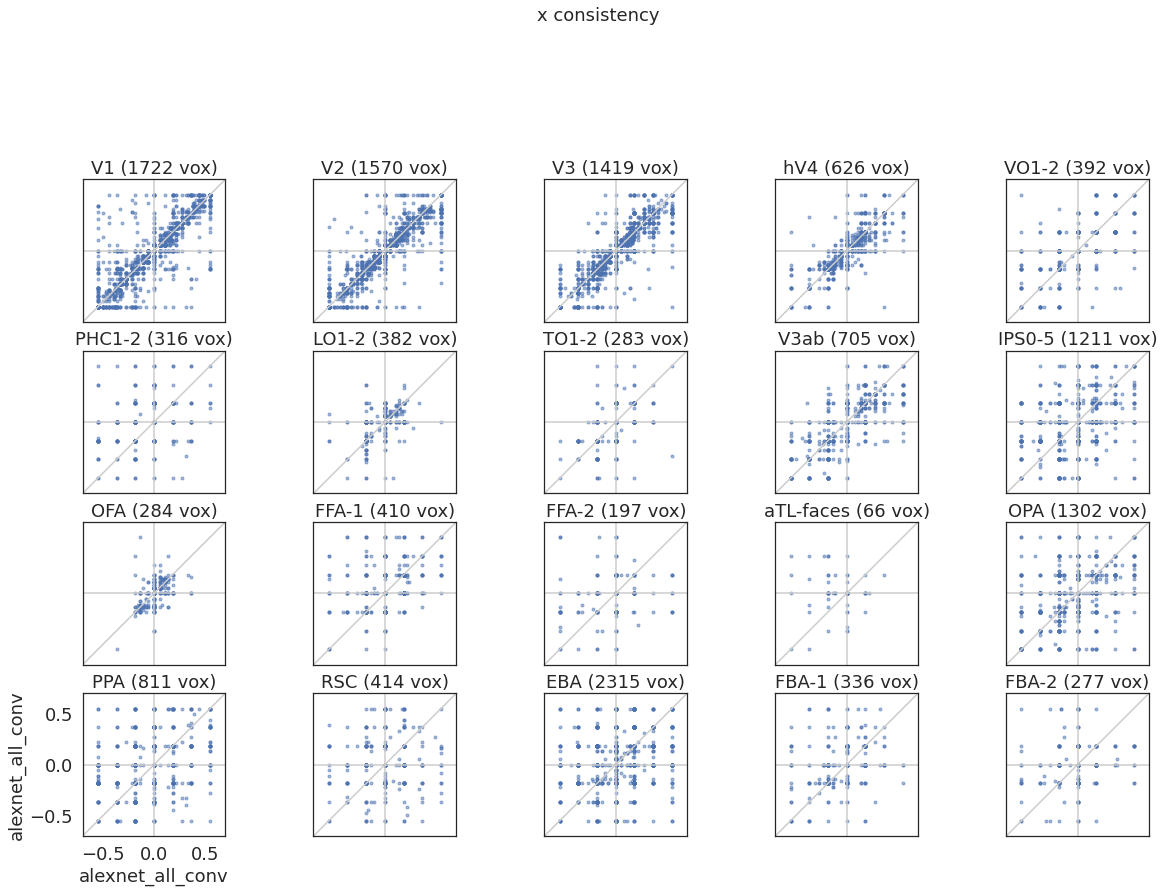

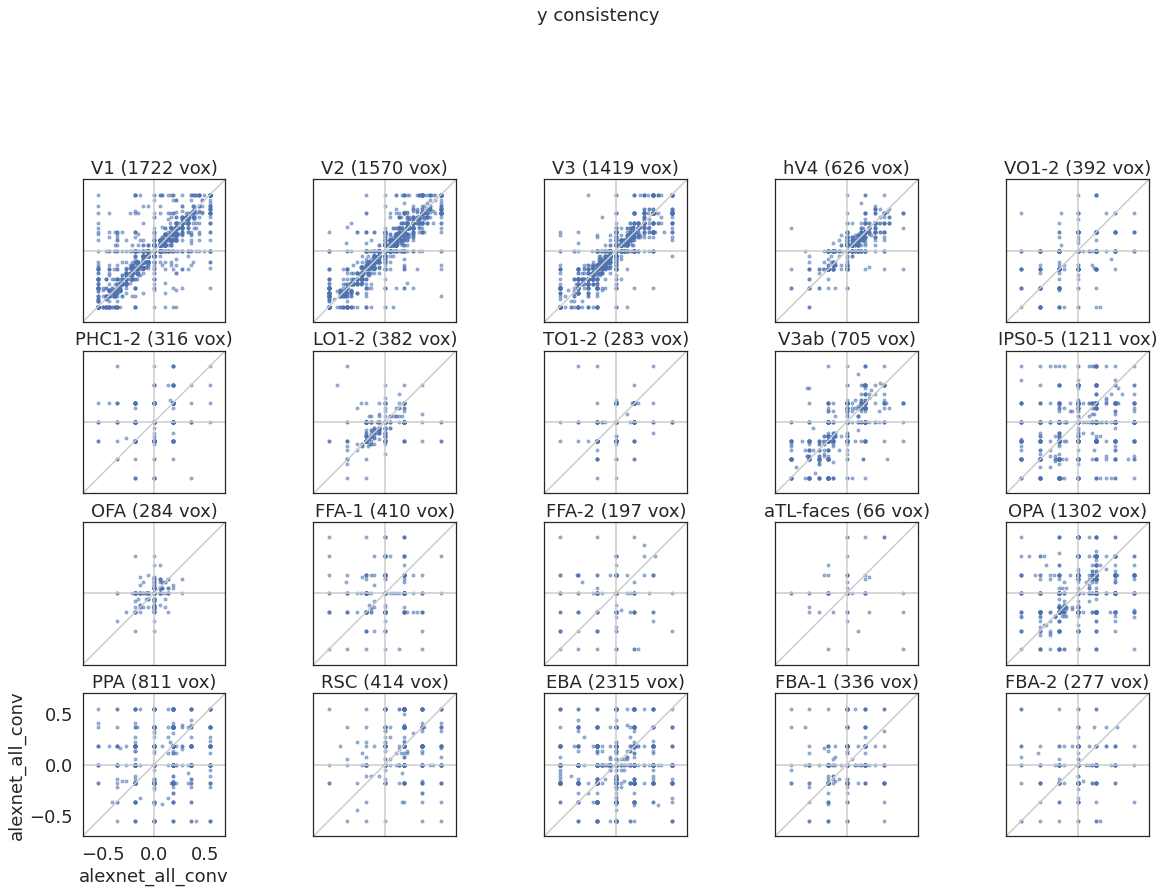

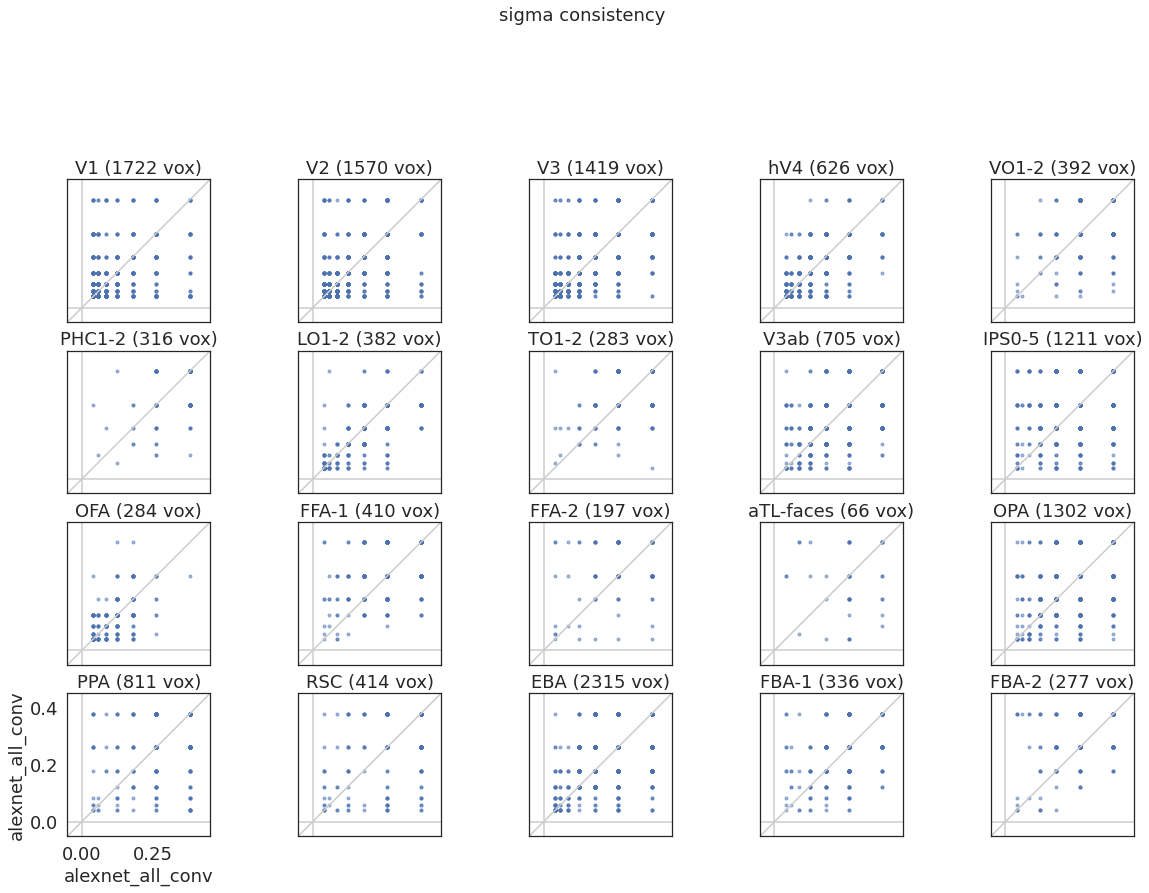

In [26]:
from utils import nsd_utils
plot_utils.set_all_font_sizes(fs = 18)
fig_size=(20,24)
parnames = ['x','y','sigma']
parlims = [[-0.7, 0.7], [-0.7, 0.7], [-0.05, 0.45]]
for pp in range(3):
    

    models1 = out1['best_params'][0][:,0,pp:pp+1]
    models2 = out2['best_params'][0][:,0,pp:pp+1]

    inds2use = (out1['val_r2'][:,0]>0) & (out2['val_r2'][:,0]>0) 
#     inds2use = (out1['val_r2'][:,0]>0) & (out2['val_r2'][:,0]>0.1) 
#     inds2use = np.ones((len(retlabs),))==1

    sp = plot_utils.scatter_plot(color=[0.29803922, 0.44705882, 0.69019608, 0.5], xlims = parlims[pp], \
                                 ylims = parlims[pp], 
                                 xlabel=fitting_type1, ylabel=fitting_type2, 
                                                            show_diagonal=True, show_axes=True);

    if fig_size is None:
        fig_size = (20,18)
    plot_utils.create_roi_subplots(np.concatenate([models1, models2], axis=1), inds2use, sp, subject, out1,\
                        suptitle='%s consistency'%parnames[pp], \
                       label_just_corner=True, figsize=fig_size, roi_def=roi_def, skip_inds=skip_inds)
    plt.gcf().subplots_adjust(bottom=0.5)
    


[[1.         0.13814066]
 [0.13814066 1.        ]]


(-0.48874483090476134,
 10.269888746162177,
 0.016799987107515346,
 7.039200105518103)

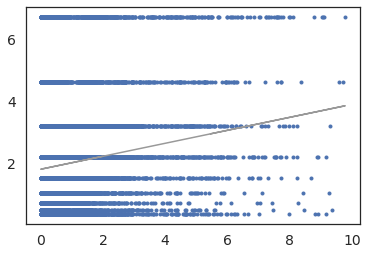

In [22]:
vox2plot = (~np.isnan(size_mapping)) & (rsq_mapping>0) & (size_mapping<10) & (best_size_deg!=84)
plt.figure();
xvals =  size_mapping[vox2plot]
yvals = best_size_deg[vox2plot]
X = np.concatenate([xvals[:,np.newaxis], np.ones((len(xvals),1))], axis=1)
y = yvals[:,np.newaxis]
linefit =  np.linalg.pinv(X) @ y
yhat = xvals*linefit[0] + linefit[1]
plt.plot(xvals,yvals,'.')
plt.plot(xvals,yhat, '-',color=[0.6, 0.6, 0.6])
print(np.corrcoef(xvals,yvals))
plt.axis('equal')
plt.

In [8]:
np.max(models2)

0.4000000059604645